## General data exploration

In [44]:
import os

train_path = "../data/train"
folders = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]

all_files = []  

for folder in folders:
    folder_path = os.path.join(train_path, folder)
    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    print(f"Dossier {folder}: {len(files)}")    

    
    for file in files:
        all_files.append(os.path.join(folder_path, file))

print(len(all_files))


Dossier angry: 3995
Dossier disgust: 436
Dossier fear: 4097
Dossier happy: 7215
Dossier neutral: 4965
Dossier sad: 4830
Dossier surprise: 3171
28709


The classes are not equal so we will use data augmentation (same idea as SMOTE but for images) to radjust their number

## Data Augmentation

We have to use open cv manipulation to increase the number of image for the class "disgust" and "surprise"

Rotation

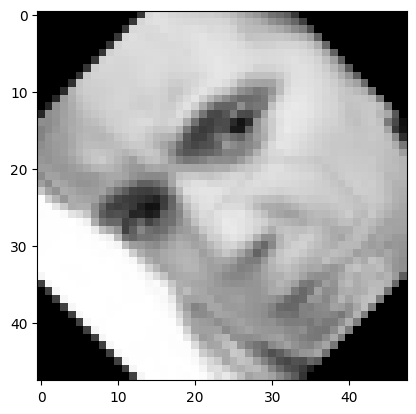

In [45]:
from matplotlib import pyplot as plt
import glob
import cv2

images_path = glob.glob("../data/train/disgust/*.jpg")

img = cv2.imread(images_path[1])
height, width = img.shape[:2]
center = (width // 2, height // 2)
angle = 45
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))
grey_image_rotated = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY) ## grey scaling, we have to convert into just 2-D to avoid the 3 canals RGB

plt.imshow(rotated_image)
plt.show()

Translation

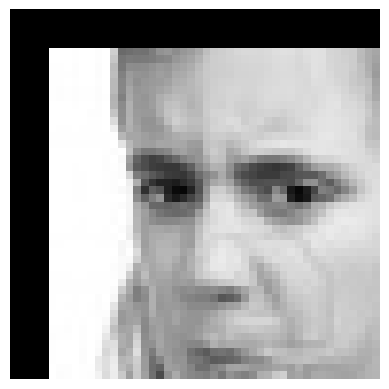

In [46]:
import numpy as np
img = cv2.imread(images_path[1])
tx, ty = 5, 5  

# Create the translation matrix
translation_matrix = np.float32([
    [1, 0, tx],
    [0, 1, ty]
])

height, width = img.shape[:2]

translated_image = cv2.warpAffine(img, translation_matrix, (width, height))

translated_image_rgb = cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB)


plt.imshow(translated_image_rgb)
plt.axis('off')
plt.show()

## Image Processing
- Greyscaling
- Resizing
- Normalisation

Resizing : we have to make sure that every image is a 48*48px and there is no more 48x48, 3 canals

Normalization 